In [106]:
import pandas as pd

df = pd.read_csv("university_rank_no_nan.csv", index_col=0, sep=",", decimal=".")
df.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,United Kingdom,20.664,11.2,95.4,1.0,41.000000,46.000000,54.0,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,United States,2.240,6.4,94.5,2.0,30.000000,47.583088,66.0,92.1,97.2,97.9,88.0,excellent
University of Cambridge,United Kingdom,18.978,10.9,94.4,3.0,37.000000,47.000000,53.0,91.4,98.7,95.8,59.3,excellent
Stanford University,United States,16.135,7.3,94.3,4.0,11.086892,43.000000,57.0,92.8,96.4,99.9,66.2,excellent
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5.0,34.000000,39.000000,61.0,90.5,92.4,99.5,86.9,excellent


In [107]:
df.isnull().sum()

Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
dtype: int64

In [108]:
izhod = df["Score_Result"]
kategoricni = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=kategoricni)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stevilski = df.select_dtypes(include=['int64', 'float64']).columns
stevilski.drop("Score_Result")
df[stevilski] = scaler.fit_transform(df[stevilski])

In [110]:
df.head()

,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Venezuela,Country_Vietnam,International_Outlook_bad,International_Outlook_excellent,International_Outlook_good
University of Oxford,-0.115104,-0.461506,3.577682,-2.230759,2.625712,-0.100112,0.390898,4.402488,4.313494,1.813729,...,False,False,False,True,False,False,False,False,True,False
California Institute of Technology,-0.366056,-0.746721,3.524553,-2.223662,1.660154,0.000000,1.145591,4.515607,4.176592,1.795695,...,False,False,False,False,True,False,False,False,True,False
University of Cambridge,-0.138069,-0.479332,3.518650,-2.216564,2.274600,-0.036874,0.328007,4.466117,4.262156,1.719953,...,False,False,False,True,False,False,False,False,True,False
Stanford University,-0.176793,-0.693243,3.512747,-2.209467,0.000000,-0.289827,0.579572,4.565096,4.130958,1.867831,...,False,False,False,False,True,False,False,False,True,False
Massachusetts Institute of Technology,-0.243372,-0.615997,3.471424,-2.202369,2.011266,-0.542781,0.831136,4.402488,3.902788,1.853403,...,False,False,False,False,True,False,False,False,True,False


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

vhod = df.drop(columns=["Score_Result", "Rank"])
x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)
lr = LinearRegression()
lr.fit(x_train, y_train)
rezultat= lr.predict(x_test)

In [112]:
df_vrednosti = pd.DataFrame({'Dejanske_vrednosti': y_test, 'Napovedane_vrednosti': rezultat})
df_vrednosti.head()

,Dejanske_vrednosti,Napovedane_vrednosti
Western Washington University,29.3,29.802490
Saitama University,19.8,19.119751
Jacobs University,45.4,46.999023
Federal University of ABC (UFABC),18.9,18.099365
Zhejiang University,61.5,60.858398


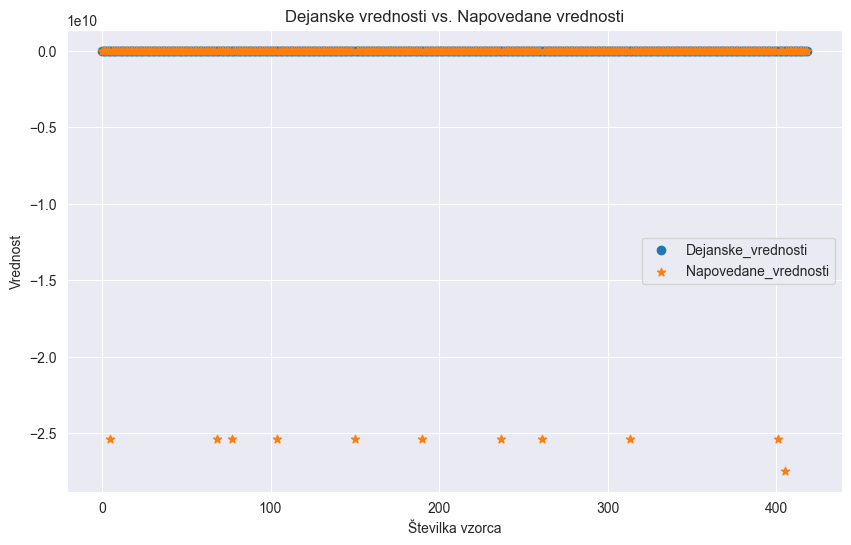

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, label='Dejanske_vrednosti', marker='o')
plt.scatter(range(len(rezultat)), rezultat, label='Napovedane_vrednosti', marker='*')

plt.title('Dejanske vrednosti vs. Napovedane vrednosti')
plt.xlabel('Številka vzorca')
plt.ylabel('Vrednost')
plt.legend()
plt.show()


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

mae = mean_absolute_error(y_test, rezultat)
mse = mean_squared_error(y_test, rezultat)
evs = explained_variance_score(y_test, rezultat)

print("MAE: " + str(mae) + "\nMeri povčno abosolutno razliko med dejanskim in napovedanim rezultatom. Ne gleda ne smer (jemlje absolutno razliko).\nManjša je boljša.")
print(f"MSE: {str(mse)}\nMeri povprečno razliko, ki jo kvadrira, med dejanskimi in napovedanimi vrednostmi.\nManjša je boljša.")
print(f"EVS: {str(evs)}\nMeri delež variacije napovedi modela in variacije dejanskih podatkov.Pove nam koliko variacije lahko model predideva.\nVečja je boljša.")

MAE: 670557109.9845635
Meri povčno abosolutno razliko med dejanskim in napovedanim rezultatom. Ne gleda ne smer (jemlje absolutno razliko).
Manjša je boljša.
MSE: 1.7136993430166544e+19
Meri povprečno razliko, ki jo kvadrira, med dejanskimi in napovedanimi vrednostmi.
Manjša je boljša.
EVS: -5.619660351301166e+16
Meri delež variacije napovedi modela in variacije dejanskih podatkov.Pove nam koliko variacije lahko model predideva.
Večja je boljša.


In [115]:
vhod = df.drop(columns=["Score_Result", "Rank", "Teaching", "Citations", "Research"])
x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)
lr = LinearRegression()
lr.fit(x_train, y_train)
rezultat= lr.predict(x_test)

mae = mean_absolute_error(y_test, rezultat)
mse = mean_squared_error(y_test, rezultat)
evs = explained_variance_score(y_test, rezultat)

print(f"MAE: {str(mae)}\nMSE: {str(mse)}\nEVS: {str(evs)}")

MAE: 37536229514.33328
MSE: 5.366979815939601e+22
EVS: -1.7599449414065376e+20


Dobil sem slabše rezultate kot prej. 

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import KFold

vhod = df.drop(columns=["Score_Result", "Rank"])
x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)

params = {
    'linearna regresija': LinearRegression(),
    'regresijsko drevo': DecisionTreeRegressor(),
    'regresijo z linearno metodo podpornih vektorjev': SVR(),
    'regresor naključnega gozda': RandomForestRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor()
}

kf = KFold(n_splits=5)
rezultat_vecih_modelov = pd.DataFrame(columns=["Model", "mean_absolute_error"])

for model_name, model in params.items():
    scores = cross_val_score(model, vhod, izhod, cv=kf, scoring="neg_mean_absolute_error")
    rezultat_vecih_modelov.loc[len(rezultat_vecih_modelov)] = [model_name, - scores.mean()]
    print(f"{model_name}: {- scores.mean()}")

rezultat_vecih_modelov.head()

linearna regresija: 148412468848.46863
regresijsko drevo: 6.383114951356887
regresijo z linearno metodo podpornih vektorjev: 5.76983698070065
regresor naključnega gozda: 5.4713118791602655
ExtraTreesRegressor: 4.963387816180237


,Model,mean_absolute_error
0,linearna regresija,1.484125e+11
1,regresijsko drevo,6.383115e+00
2,regresijo z linearno metodo podpornih vektorjev,5.769837e+00
3,regresor naključnega gozda,5.471312e+00
4,ExtraTreesRegressor,4.963388e+00


<Axes: xlabel='mean_absolute_error', ylabel='Model'>

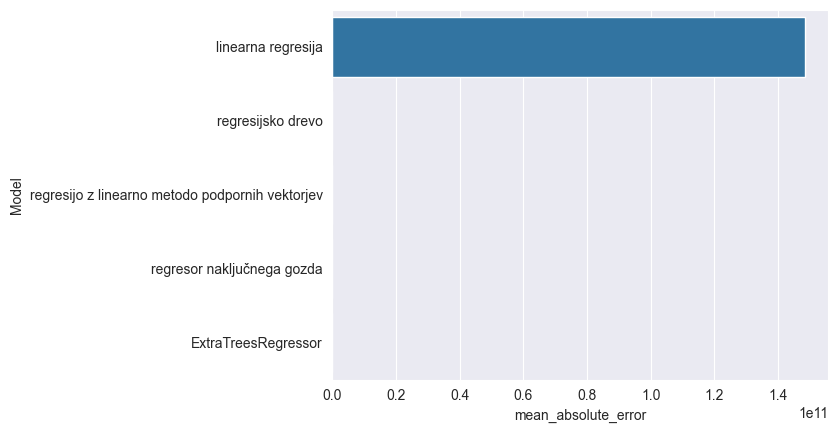

In [123]:
sns.barplot(x='mean_absolute_error', y='Model', data=rezultat_vecih_modelov)

In [118]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": (50, 100, 200),
          "criterion": ["squared_error", "absolute_error"],
          "max_depth": (5, 10, 15, 20),
          "max_features" : [None, "sqrt", "log2"]
          }

kf = KFold(n_splits=10)
random_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=kf, scoring="r2")
random_search.fit(vhod, izhod)

print(f"Best params: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Best params: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'n_estimators': 200}
Best score: -1.7533765038912859
